In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from dateutil import parser
import numpy

In [2]:
df = pd.read_csv('carpark.csv',encoding = 'gb18030' ,header=None, names=['area','location', 'floor', 'price', 'date','n'])
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['date'].apply(parse_datetime)

### to see how much parking in different areas

<Container object of 53 artists>

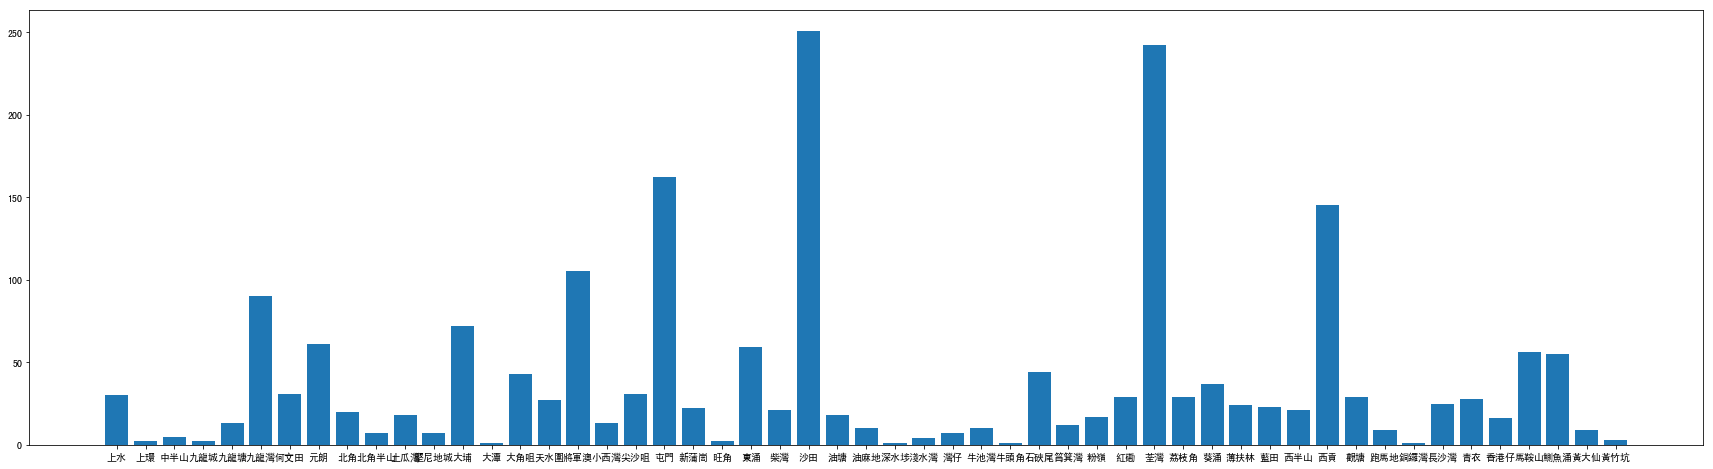

In [3]:
fig = plt.figure(figsize=(30, 8))
area_counts =df['area'].value_counts()
plt.bar(area_counts.index, area_counts)

### the most expensive parking ( price unit : million )

In [4]:
df[df['price']==df['price'].max()]

,area,location,floor,price,date,n,datetime
1059,黃大仙,新光中心,1/P31,906.0,2018-02-02,\n,2018-02-02


### compare the value of mean and median in top 10 areas

In [5]:
list_area = []
list_mean = []
list_median = []
list_area = df['area'].value_counts()[:10].index
for name in list_area:
        list_mean.append(round(df[df['area']==name]['price'].mean(), 2 ))
        list_median.append(round(df[df['area']==name]['price'].median(),2))

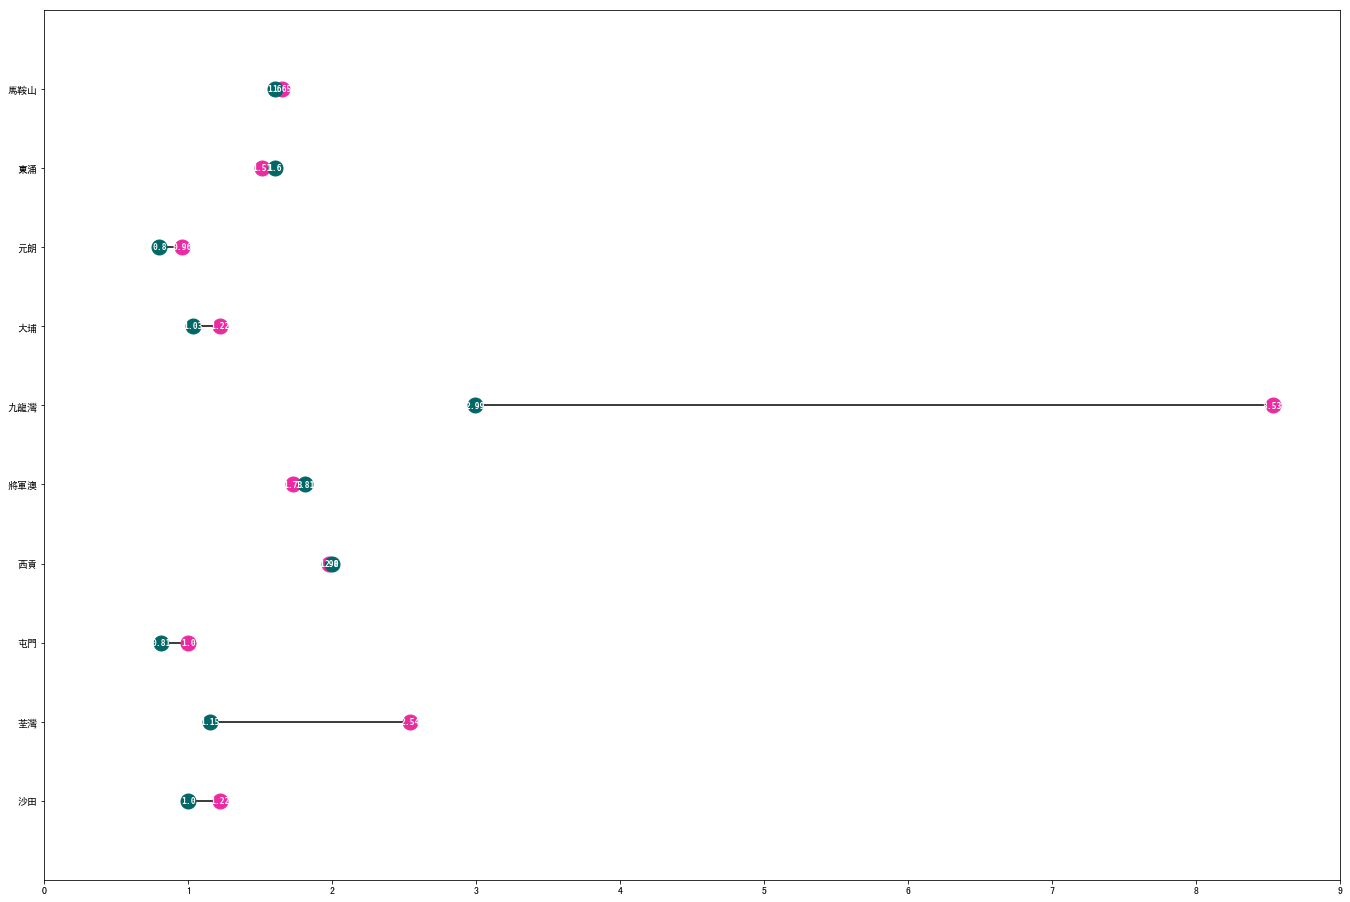

In [6]:
N = 10
# labels for categories (must have N labels)
axis_labels = list_area
# First dumbbell values (must have N values)
a = list_mean
# Second dumbbell values (must have N values)
b = list_median
A_COLOR = '#EA2BA2'  # Color to plot a values
B_COLOR = '#006666'  # Color to plot b values
LINE_COLOR = '#000000'  # Color to plot the line between dumbbells
REVERSED_ORDER = True  # Order of plotting (False: bottom to top. True: top to bottom)
########## Modify Above ##########

# Styles to be used when plotting the different elements of the graph.
dumbbell_style_a = dict(color=A_COLOR, marker='o', markersize=15)
dumbbell_style_b = dict(color=B_COLOR, marker='o', markersize=15)
line_style = dict(color=LINE_COLOR, linestyle='-')
axis_label_style = dict(horizontalalignment='right', verticalalignment='center', fontsize=12,
                        fontdict={'family': 'monospace'})
data_label_style = dict(horizontalalignment='center', verticalalignment='center', color='white', weight='bold',
                        fontsize=8, fontdict={'family': 'monospace'})

# Create the figure

fig = plt.figure(figsize=(30, 16))
ax = fig.add_subplot(111)

# Get min and max values (for plotting purposes)
min = 0
max = 9

index = list(range(N))
# Loop N times
for i in index:
    # Plot the line between dumbbells
    ax.plot([a[i], b[i]], [i, i], **line_style)
    # Plot the dumbbells.
    ax.plot(a[i], i, **dumbbell_style_a)
    ax.plot(b[i], i, **dumbbell_style_b)
    # Add data label on top of dumbbells
    ax.text(a[i], i, a[i], **data_label_style)
    ax.text(b[i], i, b[i], **data_label_style)
    # Add the axis label
    #ax.text(min, i, axis_labels[i], **axis_label_style)

# Adjust and save the figure
fig.subplots_adjust(left=0.3) # Depending on your data, you might not need this adjustment.
#ax.set_axis_off()
plt.yticks(range(0,10,1),axis_labels)#设置y轴标签显示格式
plt.xlim(min,max)
plt.ylim(-1, N)
plt.show()